In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import json
import os
 
import sys 
sys.path.insert(0, "../src")
from BrusselsMap import BrusselsMap
from GeoJsonHandler import GeoJsonHandler
from OSMGeoJsonHandler import OSMGeoJsonHandler

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
r_path = r"../data/osm/overpass-turbo/school_university.geojson"
path = os.path.join(os.getcwd(), r_path)

univ = OSMGeoJsonHandler(r_path, feature_type='university')

In [4]:
#Load geodata
r_path = r"../data/final_data/sector.json"
path = os.path.join(os.getcwd(), r_path)
sectors = GeoJsonHandler(path, "NAME_FRE")

In [6]:
univ.assign_ngh(sectors)

  0%|                                                                                                                                           | 0/606 [00:00<?, ?it/s]C:\Users\vic_t\Anaconda3\envs\mfe_env\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
 12%|███████████████▏                                                                                                                  | 71/606 [00:06<00:52, 10.18it/s]


KeyboardInterrupt: 

In [ ]:
univ.gdf.sort_values(by='AREA', ascending=False).head(15)

In [ ]:
r_path = r"../data/final_data/osm/school_university.csv"
path = os.path.join(os.getcwd(), r_path)

univ.gdf.to_csv(path, sep=',', encoding='utf-8-sig', index=False, chunksize=10000)

In [5]:
r_path = r"../data/final_data/osm/school_university.csv"
path = os.path.join(os.getcwd(), r_path)

univ = pd.read_csv(path)

In [13]:
np.sqrt(0.004227*1e6)

65.01538279515087

In [10]:
univ["AREA"].value_counts()

0.004227    160
0.007348      1
0.003376      1
0.004886      1
0.004520      1
0.007341      1
0.002382      1
0.001356      1
0.001368      1
0.004317      1
0.002079      1
0.002378      1
0.001648      1
0.002455      1
0.003026      1
0.001045      1
0.000976      1
0.000565      1
0.000480      1
0.008104      1
0.004562      1
0.000513      1
0.000392      1
0.007472      1
0.002968      1
0.001933      1
0.012403      1
0.000572      1
0.000154      1
0.008455      1
0.001987      1
0.002419      1
0.005548      1
0.006081      1
0.000940      1
0.002530      1
0.005188      1
0.011230      1
0.001357      1
0.003581      1
0.004383      1
0.000249      1
0.002536      1
0.004628      1
0.005120      1
0.000771      1
0.005220      1
0.005019      1
0.001888      1
0.000945      1
0.002091      1
0.002932      1
0.004501      1
0.001415      1
0.002345      1
0.000293      1
0.005146      1
0.004684      1
0.001270      1
0.002125      1
0.003107      1
0.004206      1
0.004569

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='AREA', ylabel='Count'>

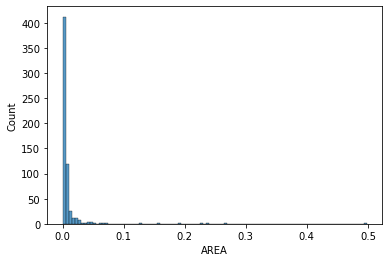

In [7]:
sns.histplot(univ, x='AREA', bins=100)

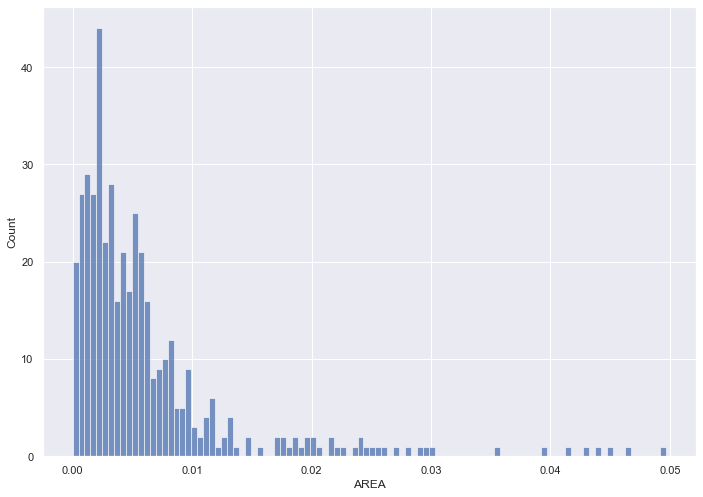

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme()
plot = sns.histplot(univ[ (univ['AREA'] < 0.05) & (round(univ['AREA'],6) != 0.004227) ], x='AREA', bins=100)

# Save fig
r_path = r"../data/osm/overpass-turbo/img/education.png"
fig = plot.get_figure()
fig.savefig(r_path) 

In [9]:
np.mean(univ[ (univ['AREA'] < 0.05) & (round(univ['AREA'],6) != 0.004227) ]['AREA'])

0.006264982789538385

In [12]:
univ[univ['AREA'] > 0.05]

,ID,TYPE,NAME,AMENITY,geometry,AREA,LAT,LON,NAME_FRE
13,13366042,relation,Vrije Universiteit Brussel — Campus Etterbeek,university,"MULTIPOLYGON (((4.3988765 50.8238996, 4.398906...",0.224782,50.822635,4.395242,UNIVERSITE
19,29451706,way,VUB — Campus Jette,university,"POLYGON ((4.3109327 50.8859787, 4.310904 50.88...",0.267349,50.886653,4.307092,HEYMBOSCH - AZ-JETTE
20,30001681,way,Athénée Royal de Woluwe-Saint-Lambert,school,"POLYGON ((4.436963 50.8488752, 4.4373676 50.84...",0.052455,50.849961,4.437543,VAL D'OR
22,30089352,way,Collège Saint-Michel,school,"POLYGON ((4.4064042 50.834076, 4.40632 50.8339...",0.060950,50.834575,4.408445,SAINT-MICHEL
23,30147960,way,Université libre de Bruxelles (Érasme),university,"POLYGON ((4.2695398 50.8152598, 4.2668265 50.8...",0.236628,50.813500,4.265455,VOGELENZANG - ERASME
24,30147999,way,Sint-Niklaasinstituut,school,"POLYGON ((4.2871407 50.811376, 4.2879514 50.81...",0.073712,50.813025,4.286901,VOGELENZANG - ERASME
33,30355110,way,Brussels European School Ⅰ,school,"POLYGON ((4.3687444 50.8000665, 4.3688773 50.7...",0.068668,50.799679,4.371643,OBSERVATOIRE
34,30356704,way,European School Brussels II,school,"POLYGON ((4.4433265 50.8568971, 4.4434692 50.8...",0.052830,50.858334,4.443387,VAL D'OR
35,30358555,way,Université libre de Bruxelles (La Plaine),university,"POLYGON ((4.3965725 50.8177683, 4.3969588 50.8...",0.189937,50.819346,4.398632,UNIVERSITE
59,30647110,way,International School of Brussels,school,"POLYGON ((4.4189456 50.7923056, 4.4185074 50.7...",0.125600,50.789809,4.417038,FORET DE SOIGNES


In [16]:
univ.sort_values(by="AREA", ascending=False).head(50)

,ID,TYPE,NAME,AMENITY,geometry,AREA,LAT,LON,NAME_FRE
375,758766457,way,UCLouvain Bruxelles Woluwe,university,"POLYGON ((4.4471002 50.8503395, 4.4468346 50.8...",0.498321,50.850882,4.453689,KAPELLEVELD
19,29451706,way,VUB — Campus Jette,university,"POLYGON ((4.3109327 50.8859787, 4.310904 50.88...",0.267349,50.886653,4.307092,HEYMBOSCH - AZ-JETTE
23,30147960,way,Université libre de Bruxelles (Érasme),university,"POLYGON ((4.2695398 50.8152598, 4.2668265 50.8...",0.236628,50.813500,4.265455,VOGELENZANG - ERASME
13,13366042,relation,Vrije Universiteit Brussel — Campus Etterbeek,university,"MULTIPOLYGON (((4.3988765 50.8238996, 4.398906...",0.224782,50.822635,4.395242,UNIVERSITE
35,30358555,way,Université libre de Bruxelles (La Plaine),university,"POLYGON ((4.3965725 50.8177683, 4.3969588 50.8...",0.189937,50.819346,4.398632,UNIVERSITE
226,150213175,way,Université Libre de Bruxelles (Campus du Solbo...,university,"POLYGON ((4.3780781 50.8136479, 4.3784706 50.8...",0.157348,50.813311,4.381825,BOONDAEL
59,30647110,way,International School of Brussels,school,"POLYGON ((4.4189456 50.7923056, 4.4185074 50.7...",0.125600,50.789809,4.417038,FORET DE SOIGNES
24,30147999,way,Sint-Niklaasinstituut,school,"POLYGON ((4.2871407 50.811376, 4.2879514 50.81...",0.073712,50.813025,4.286901,VOGELENZANG - ERASME
33,30355110,way,Brussels European School Ⅰ,school,"POLYGON ((4.3687444 50.8000665, 4.3688773 50.7...",0.068668,50.799679,4.371643,OBSERVATOIRE
22,30089352,way,Collège Saint-Michel,school,"POLYGON ((4.4064042 50.834076, 4.40632 50.8339...",0.060950,50.834575,4.408445,SAINT-MICHEL


In [14]:
univ[univ['AREA'] > 0.05]['AREA'].sum()

2.0085799832956597

In [50]:
univ[univ['AREA'] < 0.05]['AREA'].sum()

3.3953692835509877

In [18]:
1.69/(3.7+1.69)

0.31354359925788494

In [51]:
2/(2+3.4)

0.37037037037037035